# Matplotlib Tutorial


### Lesson 1 - First Plots

In [1]:
import csv

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
from collections import Counter

In [5]:
import numpy as np

In [6]:
%matplotlib notebook

In [7]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<IPython.core.display.Javascript object>


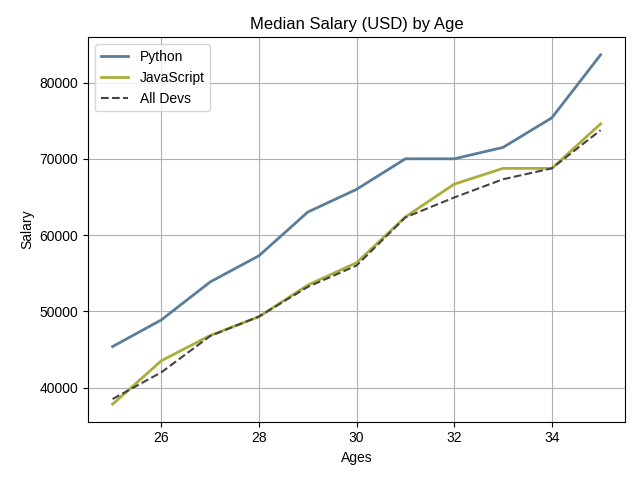

In [8]:
# plt.style.use('seaborn-talk')
# plt.xkcd()

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]

js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

fig_med_sal, ax_med_sal = plt.subplots()

ax_med_sal.plot(ages_x, py_dev_y, color='#5a7d9a', linewidth=2, label='Python')
ax_med_sal.plot(ages_x, js_dev_y, color='#adad3b', linewidth=2, label='JavaScript')
ax_med_sal.plot(ages_x, dev_y, color='#444444', linestyle='--', label='All Devs')


ax_med_sal.set_title('Median Salary (USD) by Age')
ax_med_sal.set_xlabel('Ages')
ax_med_sal.set_ylabel('Salary')

ax_med_sal.legend()

ax_med_sal.grid()

plt.tight_layout() #for padding issues

fig_med_sal.savefig('plot.png')

plt.show()

### Lesson 2 - Bar charts and Analyzing Data from CSVs

<IPython.core.display.Javascript object>


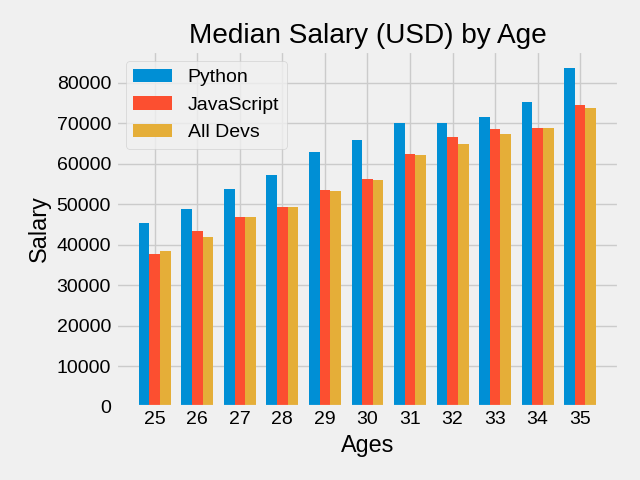

In [9]:
plt.style.use('fivethirtyeight')

x_indexes = np.arange(len(ages_x))
width = 0.25

fig_med_sal_b, ax_med_sal_b = plt.subplots()

ax_med_sal_b.bar(x_indexes - width, py_dev_y, width=width, label='Python')
ax_med_sal_b.bar(x_indexes, js_dev_y, width=width, label="JavaScript")
ax_med_sal_b.bar(x_indexes + width, dev_y, width=width, label='All Devs')

ax_med_sal_b.set_xticks(x_indexes)
ax_med_sal_b.set_xticklabels(ages_x)

ax_med_sal_b.set_title('Median Salary (USD) by Age')
ax_med_sal_b.set_ylabel('Salary')
ax_med_sal_b.set_xlabel('Ages')
ax_med_sal_b.legend()

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


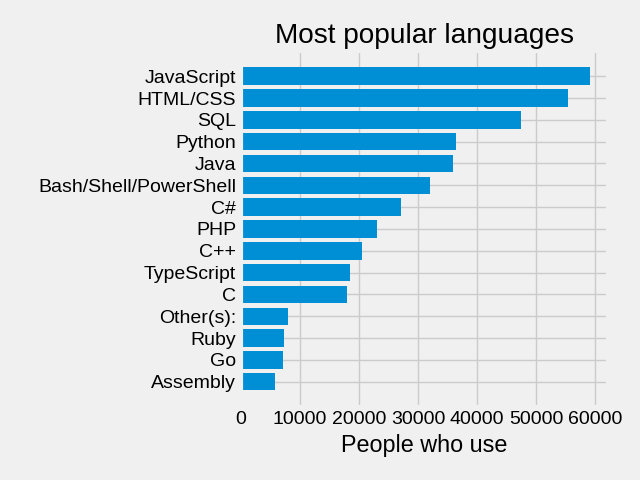

In [10]:
# Reading the csv file using built-in csv module

# with open('data.csv') as csv_file:
#     csv_reader = csv.DictReader(csv_file)
    
#     language_counter = Counter()
    
#     for row in csv_reader:
#         language_counter.update(row['LanguagesWorkedWith'].split(';'))

# Reading the csv file using pandas

data = pd.read_csv('data.csv')
ids = data["Responder_id"]
lang_responses = data['LanguagesWorkedWith']

language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(';'))


languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])
    
languages.reverse()
popularity.reverse()

fig_pop_lang, ax_pop_lang = plt.subplots()
    
ax_pop_lang.barh(languages, popularity)

ax_pop_lang.set_title('Most popular languages')
ax_pop_lang.set_xlabel('People who use')

plt.tight_layout()
plt.show()
    

### Lesson 3 - Pie Charts

<IPython.core.display.Javascript object>


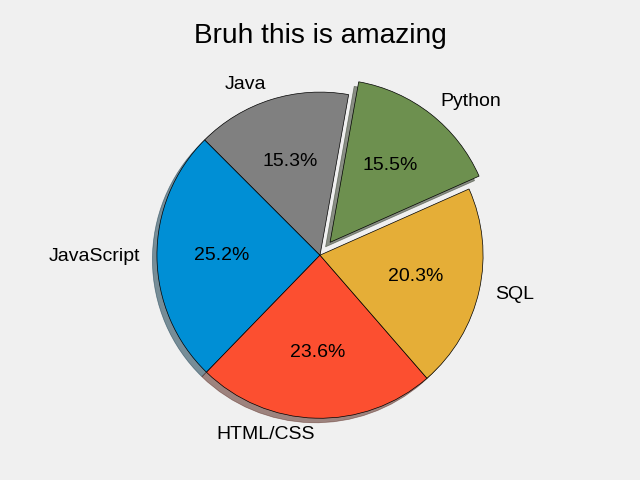

In [11]:
plt.style.use('fivethirtyeight')

slices = [59219, 55466, 47544, 36443, 35917]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f', 'gray']
explode = [0, 0, 0, 0.1, 0]

fig_pop_lang_pie, ax_pop_lang_pie = plt.subplots()

ax_pop_lang_pie.pie(slices, labels=labels, colors=colors, explode=explode, startangle=135,
        shadow=True, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

ax_pop_lang_pie.set_title('Bruh this is amazing')
plt.tight_layout()
plt.show()

### Lesson 4 - Stack Plots

<IPython.core.display.Javascript object>


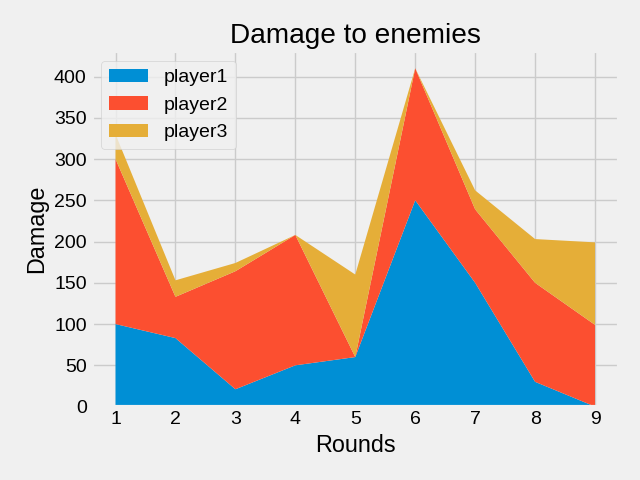

In [12]:
plt.style.use('fivethirtyeight')

rounds = [1, 2, 3, 4, 5, 6, 7, 8, 9]

player1 = [100, 83, 21, 50, 60, 250, 150, 30, 0]
player2 = [200, 50, 143, 158, 0, 160, 89, 120, 99]
player3 = [30, 20, 10, 0, 100, 0, 23, 53, 100]

labels = ['player1', 'player2', 'player3']

fig_dmg_stackplt, ax_dmg_stackplt = plt.subplots()

ax_dmg_stackplt.stackplot(rounds, player1, player2, player3, labels=labels)

ax_dmg_stackplt.legend(loc='upper left')

ax_dmg_stackplt.set_xlabel('Rounds')
ax_dmg_stackplt.set_ylabel('Damage')
ax_dmg_stackplt.set_title('Damage to enemies')

plt.tight_layout()

plt.show()

### Lesson 5 - Filling Area on Line Plots

<IPython.core.display.Javascript object>


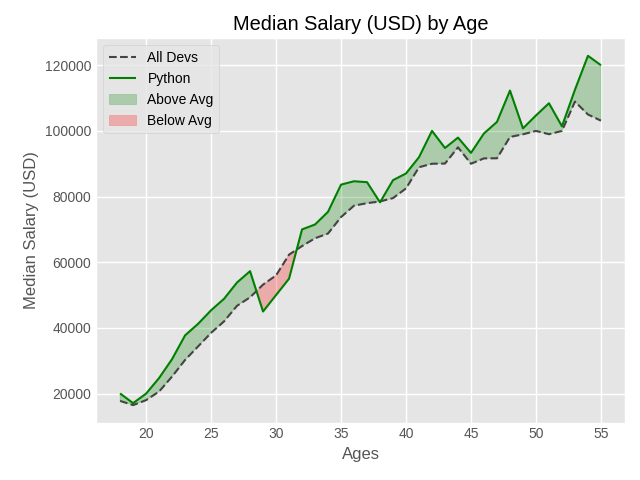

In [13]:
plt.style.use('ggplot')

data = pd.read_csv('salaries.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

fig_med_sal_fill, ax_med_sal_fill = plt.subplots()

ax_med_sal_fill.plot(ages, dev_salaries, color='#444444',
         linestyle='--', linewidth=1.5, label='All Devs')

ax_med_sal_fill.plot(ages, py_salaries, color='green', linewidth=1.5, label='Python')


overall_median = 57287


ax_med_sal_fill.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries > dev_salaries),
                 interpolate=True, color='green', alpha=0.25, label='Above Avg')

ax_med_sal_fill.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries <= dev_salaries),
                 interpolate=True, color='red', alpha=0.25, label='Below Avg')

ax_med_sal_fill.legend()
ax_med_sal_fill.set_title('Median Salary (USD) by Age')
ax_med_sal_fill.set_xlabel('Ages')
ax_med_sal_fill.set_ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()

### Lesson 6 - Histograms

<IPython.core.display.Javascript object>


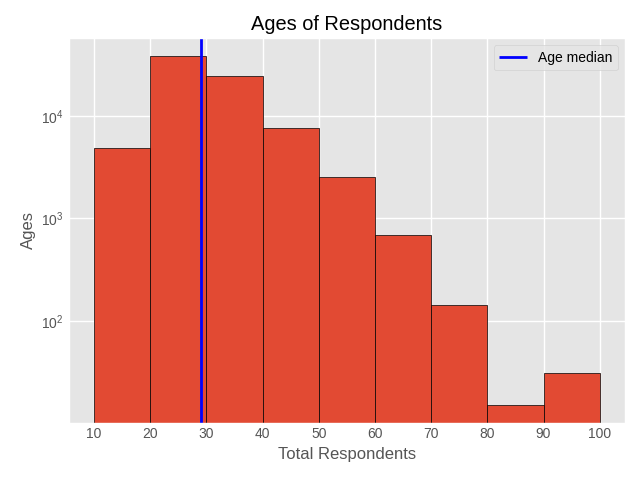

In [14]:
plt.style.use('ggplot')

data = pd.read_csv('ages.csv')

ids = data['Responder_id']
ages = data['Age']

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

fig_ages_hist, ax_ages_hist = plt.subplots()

ax_ages_hist.hist(ages, bins=bins, edgecolor='black', log=True)


median_age = 29

ax_ages_hist.axvline(median_age, color='blue', label='Age median', linewidth=2)
ax_ages_hist.legend()
ax_ages_hist.set_xticks(bins)

ax_ages_hist.set_title('Ages of Respondents')
ax_ages_hist.set_ylabel('Ages')
ax_ages_hist.set_xlabel('Total Respondents')

plt.tight_layout()
plt.show()


### Lesson 7 - Scatter Plots

<IPython.core.display.Javascript object>


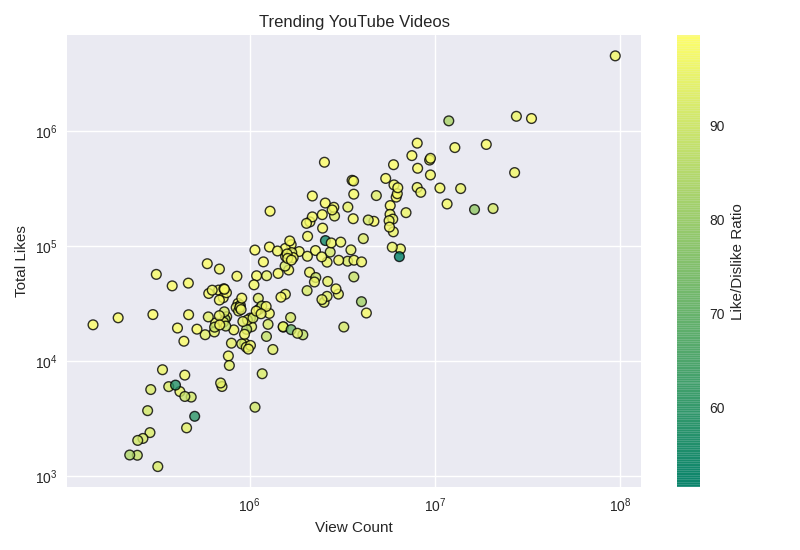

In [15]:
plt.style.use('seaborn')

data = pd.read_csv('2019-05-31-data.csv')
view_count = data['view_count']
likes = data['likes']
ratio = data['ratio']

fig_yt_scat, ax_yt_scat = plt.subplots()

sct = ax_yt_scat.scatter(view_count, likes, c=ratio, cmap='summer', edgecolor='black', linewidth=1, alpha=0.8)

cbar = fig_yt_scat.colorbar(sct, ax=ax_yt_scat)
cbar.set_label('Like/Dislike Ratio')

ax_yt_scat.set_xscale('log')
ax_yt_scat.set_yscale('log')


ax_yt_scat.set_title('Trending YouTube Videos')
ax_yt_scat.set_xlabel('View Count')
ax_yt_scat.set_ylabel('Total Likes')

plt.tight_layout()

plt.show()

### Lesson 8 - Time series

<IPython.core.display.Javascript object>


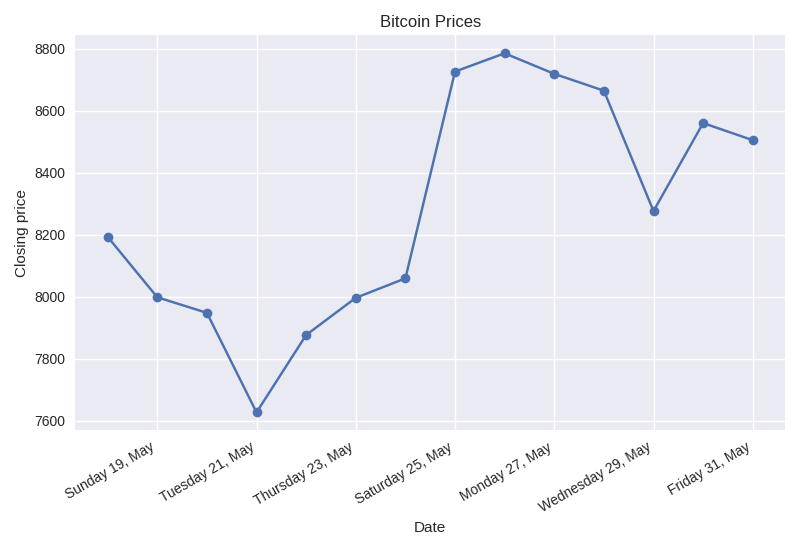

In [16]:
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

data = pd.read_csv('bitcoin.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

price_date = data['Date']
price_close = data['Close']

fig_btc, ax_btc = plt.subplots()


ax_btc.plot_date(price_date, price_close, linestyle='solid')

fig_btc.autofmt_xdate()

date_format = mpl_dates.DateFormatter('%A %d, %B')

ax_btc.xaxis.set_major_formatter(date_format)

ax_btc.set_title('Bitcoin Prices')
ax_btc.set_xlabel('Date')
ax_btc.set_ylabel('Closing price')

plt.tight_layout()

plt.show()

### Lesson 9 - Plotting live data

<IPython.core.display.Javascript object>


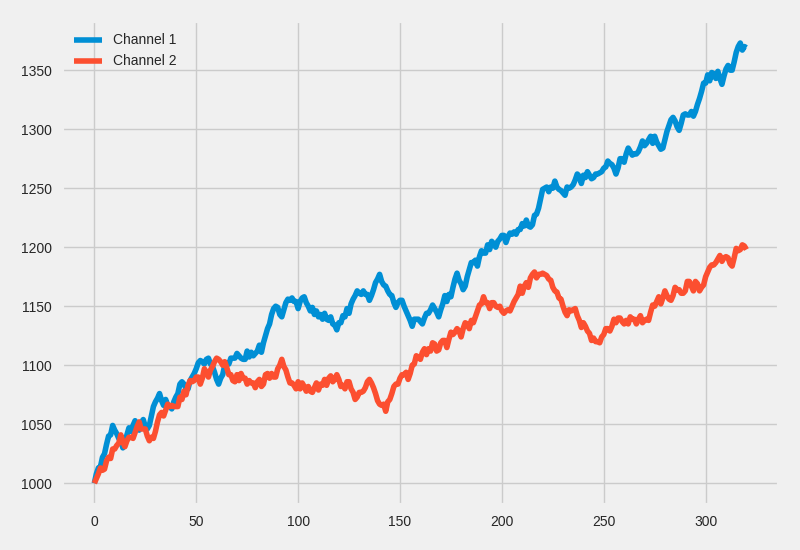

In [19]:
import random
from itertools import count
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

index = count()

fig_live, ax_live = plt.subplots()

def animate(i):
    data = pd.read_csv('live.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']
    
    ax_live.clear()
    ax_live.plot(x, y1, label='Channel 1')
    ax_live.plot(x, y2, label='Channel 2')
    
    ax_live.legend(loc='upper left')
    fig_live.tight_layout()

    
ani = FuncAnimation(fig_live, animate, interval=1000)


plt.tight_layout()
plt.show()

### Lesson 10 - Subplots

<IPython.core.display.Javascript object>


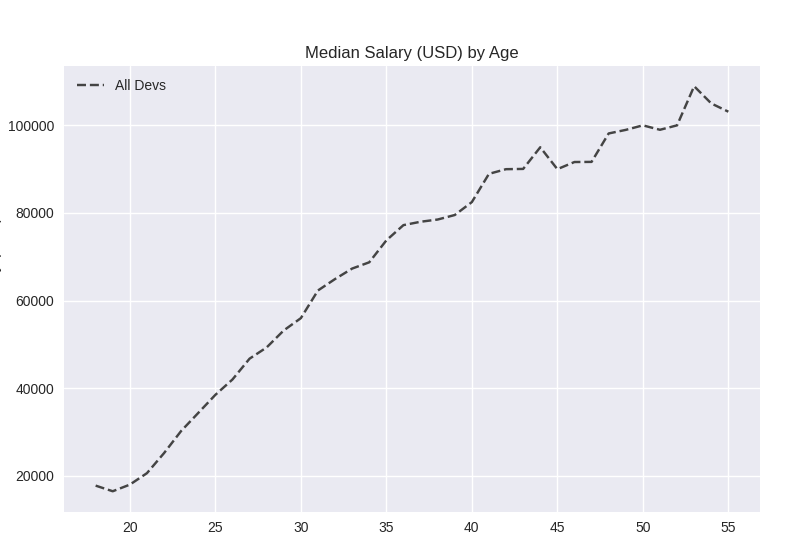

<IPython.core.display.Javascript object>


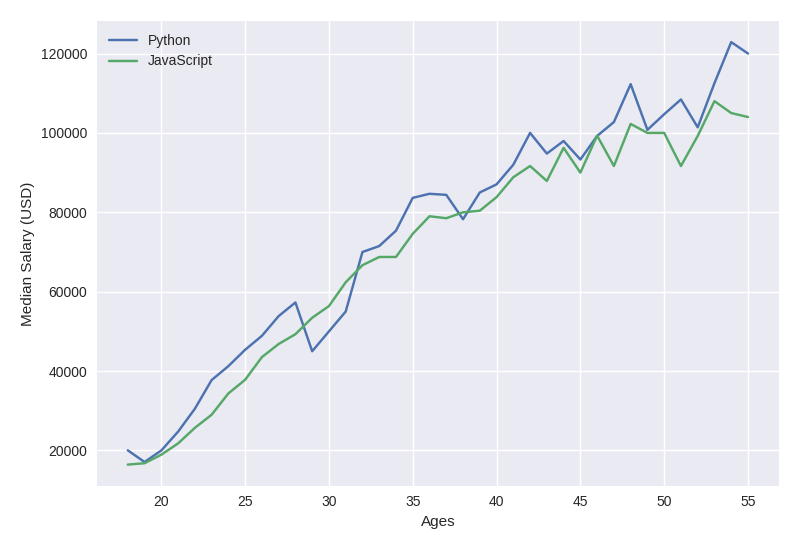

In [18]:
plt.close()

plt.style.use('seaborn')

data = pd.read_csv('salaries.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

ax2.plot(ages, py_salaries, label='Python')
ax2.plot(ages, js_salaries, label='JavaScript')

ax1.legend()
ax1.set_title('Median Salary (USD) by Age')
ax1.set_ylabel('Median Salary (USD)')

ax2.legend()
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()

fig1.savefig('fig1.png')
fig2.savefig('fig2.png')